In [1]:
from model import AdaptationModel
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns
import pandas as pd
import mesa 

In [2]:
#this is a function for running and plotting and eventually storing KPIs and so on 
#import mesa

#scenario = 'Government support'
def runandplot(params, scenario): 
    results = mesa.batch_run(
        AdaptationModel,
        parameters=params,
        iterations=30,
        max_steps=80,
        number_processes=1,
        data_collection_period=1,  # Important, otherwise the datacollector will only collect data of the last time step
        display_progress=True,
    )
    results

    results_df = pd.DataFrame(results)
    print(f"Column names in the dataframe: {results_df.columns.tolist()}")
    results_filtered  = results_df[['iteration', 'Step','AgentID', 'age_mean', 'income_mean', 'response_efficacy_mean','self_efficacy_mean', 'I_threshold', 'policy','Worry', 'FloodDamageActual', 'IsAdapted', 'Self_Adaption', 'Cum_Invest']].reset_index(drop=True)
    results_filtered.head(5)
    #filter for one agent 0 
    results_agent_filtered = results_df[(results_df.AgentID == 0)]
    results_agent_filtered
    # result_agent_long = results_agent_filtered.T.unstack().reset_index()
    # result_agent_long.columns = ["Step", "AgentID", "Variable", "Value"]
    # result_agent_long  
    results_agent_filtered

    return results_agent_filtered, results_filtered
    

In [3]:
#Now we can just run the function- its easier
params = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':[40000, 45000, 50000], 'policy':[0.8, 0.9,1.0], 'age_mean':[30,40,50], 'income_mean': [30000, 50000, 80000]}
scenario = 'Government Support' 
policy = 'Do Nothing'

In [4]:
params_all = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':[40000, 45000, 50000], 'policy':[0.8, 0.9,1.0], 'age_mean':[30,40,50], 'income_mean': [30000, 50000, 80000]}
params_base = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0, 'age_mean':40, 'income_mean': 50000}

Run Models

In [5]:
#Takes 15min 
results_agent_nopolicy, results_nopolicy = runandplot(params=params_base,scenario=scenario)

  0%|          | 0/30 [00:00<?, ?it/s]

100%|██████████| 30/30 [00:04<00:00,  7.20it/s]


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [6]:
results_nopolicy.to_csv('results_nopolicy')
results_agent_nopolicy.to_csv('results_agent_nopolicy')

In [7]:
results = pd.read_csv('results_nopolicy')
results_agent = pd.read_csv('results_agent_nopolicy')



Include policy

In [8]:
results['Policy'] = 'No Policy'
#Policy 1 = Do Nothing 
#Policy 2 = I_threshold
#Policy 3 = response efficacy 
#Policy 4 = reduce cost and response efficiacy (mediocre) 


pol1 = results.loc[(results['I_threshold']==50000) & ((results['policy']==1.0))].index
pol2 = results.loc[(results['I_threshold']==40000) & ((results['policy']==1.0))].index
pol3 = results.loc[(results['I_threshold']==50000) & ((results['policy']==0.8))].index
pol4 =  results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
pol5 = results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
results.loc[pol1,'Policy']='Do Nothing'
results.loc[pol2,'Policy']='Subsidy'
results.loc[pol3,'Policy']='Information Campaign'
results.loc[pol4,'Policy']='Subsidy and Information campaign'

#Ithreshold
results['Subsidy'] = 'i'

I1 = results.loc[(results['I_threshold']==50000)].index
I2 = results.loc[(results['I_threshold']==45000)].index
I3 = results.loc[(results['I_threshold']==40000)].index

results.loc[I1,'Subsidy']='No Subsidy'
results.loc[I2,'Subsidy']='Mediocre Subsidy'
results.loc[I3,'Subsidy']='High Subsidy'

#'policy'
#Ithreshold
results['Information Campaign'] = 'i'

Inf1 = results.loc[(results['policy']==1.0)].index
Inf2 = results.loc[(results['policy']==0.9)].index
Inf3 = results.loc[(results['policy']==0.8)].index

results.loc[Inf1,'Information Campaign']='No Information'
results.loc[Inf2,'Information Campaign']='Mediocre Information'
results.loc[Inf3,'Information Campaign']='High Information'

results['FloodDamageActual'] = results['FloodDamageActual']*788




In [9]:
socio1 = results.loc[(results['age_mean']==30) & ((results['income_mean']==30000))]
socio2 = results.loc[(results['age_mean']==50) & ((results['income_mean']==30000))]
socio3 = results.loc[(results['age_mean']==30) & ((results['income_mean']==80000))]
socio4 = results.loc[(results['age_mean']==50) & ((results['income_mean']==80000))]
base = results.loc[(results['age_mean']==40) & ((results['income_mean']==50000))]

In [10]:
agent1 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==30000))]
agent2 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==30000))]
agent3 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==80000))]
agent4 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==80000))]
agnetbase = results_agent.loc[(results['age_mean']==40) & ((results_agent['income_mean']==50000))]

In [11]:
results.head()

,Unnamed: 0,iteration,Step,AgentID,age_mean,income_mean,I_threshold,policy,Worry,FloodDamageActual,IsAdapted,Self_Adaption,Cum_Invest,Policy,Subsidy,Information Campaign
0,0,0,0,0,40,50000,50000,1.0,0.114056,0.0,False,0,0.0,Do Nothing,No Subsidy,No Information
1,1,0,0,1,40,50000,50000,1.0,0.000000,0.0,False,0,0.0,Do Nothing,No Subsidy,No Information
2,2,0,0,2,40,50000,50000,1.0,0.179828,0.0,False,0,0.0,Do Nothing,No Subsidy,No Information
3,3,0,0,3,40,50000,50000,1.0,0.111365,0.0,False,0,0.0,Do Nothing,No Subsidy,No Information
4,4,0,0,4,40,50000,50000,1.0,0.295019,0.0,False,0,0.0,Do Nothing,No Subsidy,No Information


### Base Scenario - Policiy Levers  
First KPIs for Policy Levers independently - then join policy levers to create joint policy

C:\Users\thoma\AppData\Local\Temp\ipykernel_8252\1009674341.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


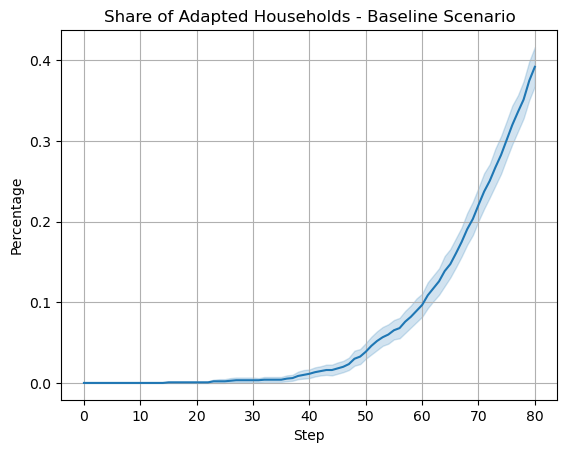

In [12]:
g = sns.lineplot(
    data=base.loc[base['policy']==1.0], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Share of Adapted Households - Baseline Scenario')
g.set(ylabel='Percentage')
plt.grid(True)
g.figure.savefig("BASE Share of Adapted Households - Baseline Scenario.jpg")

C:\Users\thoma\AppData\Local\Temp\ipykernel_8252\2664379085.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


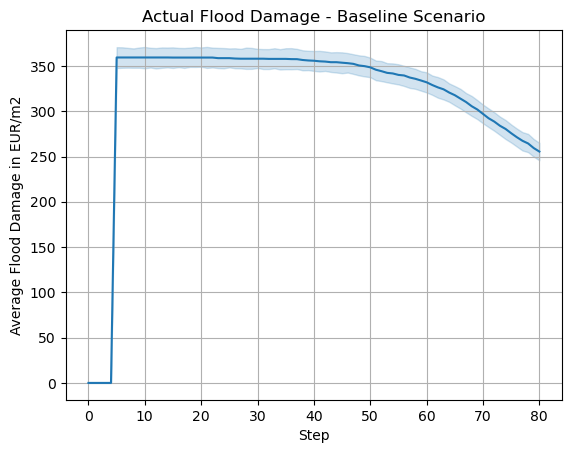

In [18]:
g = sns.lineplot(
    data=base.loc[base['policy']==1.0], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Actual Flood Damage - Baseline Scenario')
g.set(ylabel='Average Flood Damage in EUR/m2')
plt.grid(True)
g.figure.savefig("BASE Actual Flood Damage - Baseline Scenario.jpg")

In [15]:
df = base
alpha = df.loc[df['Step']==40].shape[0]
a = df.loc[df['Step']==40]
a1 = [a[a['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
b = df.loc[df['Step']==60]
b1 = [b[b['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
c = df.loc[df['Step']==80]
c1 = [c[c['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha]
    
adaptation = pd.DataFrame({"Step40": a1, "Step60": b1, "Step80": c1}).T
adaptation.columns = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']

In [100]:
adaptation

,Do Nothing,Insurance,Structural,Adaptive Building use,Flood Barrier
Step40,0.975000,0.010167,0.003333,0.009333,0.002167
Step60,0.831500,0.083000,0.015667,0.058833,0.011000
Step80,0.478167,0.261833,0.048167,0.179500,0.032333


In [16]:
def plot_actions(df, title, scenario):
    alpha = df.loc[df['Step']==40].shape[0]
    a = df.loc[df['Step']==40]
    a1 = [a[a['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
    b = df.loc[df['Step']==60]
    b1 = [b[b['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
    c = df.loc[df['Step']==80]
    c1 = [c[c['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha]
    
    adaptation = pd.DataFrame({"Step40": a1, "Step60": b1, "Step80": c1}).T
    adaptation.columns = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
    ax = adaptation.plot.bar(color=sns.color_palette('tab10'))  
    actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
    ax.set_ylabel('Percent')
    #ax.set_xticklabels(actions)
    ax.set_title(f'Flood Actions taken at time step - {title}')
    ax.figure.savefig(f'{scenario} Flood Actions taken at time step - {title}.jpg')
    plt.grid(True)
    plt.tight_layout()

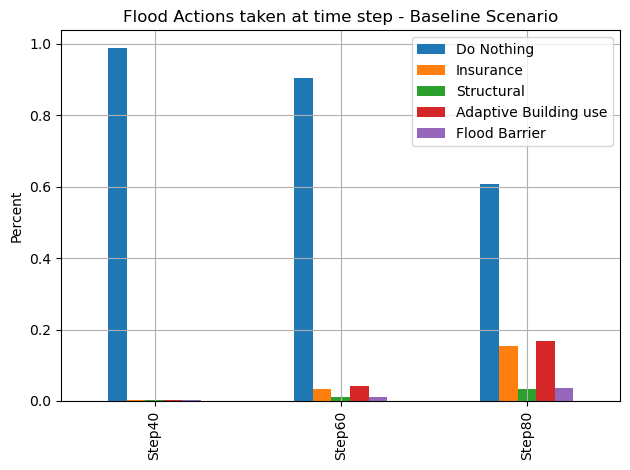

In [17]:
plot_actions(base, 'Baseline Scenario', 'BASE')

# Other Scenarios

In [49]:
params_all = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':[40000, 45000, 50000], 'policy':[0.8, 0.9,1.0], 'age_mean':[30,40,50], 'income_mean': [30000, 50000, 80000]}
params_base = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0, 'age_mean':40, 'income_mean': 50000}
params_scenarios = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':[40000,50000], 'policy':[0.8,1.0], 'age_mean':[30,40,50], 'income_mean': [30000, 50000, 80000]}

Run Models

In [50]:
#Takes 15min 
results_agent_nopolicy, results_nopolicy = runandplot(params=params_scenarios,scenario=scenario)

100%|██████████| 1080/1080 [08:52<00:00,  2.03it/s] 


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [51]:
results_nopolicy.to_csv('results_scenarios')
results_agent_nopolicy.to_csv('results_agent_scenarios')
results = pd.read_csv('results_scenarios')
results_agent = pd.read_csv('results_agent_scenarios')


#Include policy
results['Policy'] = 'No Policy'
#Policy 1 = Do Nothing 
#Policy 2 = I_threshold
#Policy 3 = response efficacy 
#Policy 4 = reduce cost and response efficiacy (mediocre) 


pol1 = results.loc[(results['I_threshold']==50000) & ((results['policy']==1.0))].index
pol2 = results.loc[(results['I_threshold']==40000) & ((results['policy']==1.0))].index
pol3 = results.loc[(results['I_threshold']==50000) & ((results['policy']==0.8))].index
pol4 =  results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
pol5 = results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
results.loc[pol1,'Policy']='Do Nothing'
results.loc[pol2,'Policy']='Subsidy'
results.loc[pol3,'Policy']='Information Campaign'
results.loc[pol4,'Policy']='Subsidy and Information campaign'

#Ithreshold
results['Subsidy'] = 'i'

I1 = results.loc[(results['I_threshold']==50000)].index
I3 = results.loc[(results['I_threshold']==40000)].index

results.loc[I1,'Subsidy']='No Subsidy'
results.loc[I3,'Subsidy']='Subsidy'

#'policy'
#Ithreshold
results['Information Campaign'] = 'i'

Inf1 = results.loc[(results['policy']==1.0)].index
Inf3 = results.loc[(results['policy']==0.8)].index

results.loc[Inf1,'Information Campaign']='No Information'
results.loc[Inf3,'Information Campaign']='Information campaign'

results['FloodDamageActual'] = results['FloodDamageActual']*788


socio1 = results.loc[(results['age_mean']==30) & ((results['income_mean']==30000))]
socio2 = results.loc[(results['age_mean']==50) & ((results['income_mean']==30000))]
socio3 = results.loc[(results['age_mean']==30) & ((results['income_mean']==80000))]
socio4 = results.loc[(results['age_mean']==50) & ((results['income_mean']==80000))]
base = results.loc[(results['age_mean']==40) & ((results['income_mean']==50000))]
agent1 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==30000))]
agent2 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==30000))]
agent3 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==80000))]
agent4 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==80000))]
agnetbase = results_agent.loc[(results['age_mean']==40) & ((results_agent['income_mean']==50000))]



results.head()

,Unnamed: 0,iteration,Step,AgentID,age_mean,income_mean,I_threshold,policy,Worry,FloodDamageActual,IsAdapted,Self_Adaption,Cum_Invest,Policy,Subsidy,Information Campaign
0,0,0,0,0,30,30000,40000,0.8,0.000000,0.0,False,0,0.0,Subsidy and Information campaign,Subsidy,Information campaign
1,1,0,0,1,30,30000,40000,0.8,0.000000,0.0,False,0,0.0,Subsidy and Information campaign,Subsidy,Information campaign
2,2,0,0,2,30,30000,40000,0.8,0.106025,0.0,False,0,0.0,Subsidy and Information campaign,Subsidy,Information campaign
3,3,0,0,3,30,30000,40000,0.8,0.000000,0.0,False,0,0.0,Subsidy and Information campaign,Subsidy,Information campaign
4,4,0,0,4,30,30000,40000,0.8,0.081963,0.0,False,0,0.0,Subsidy and Information campaign,Subsidy,Information campaign


In [142]:
socio1['age_mean']

0          30
1          30
2          30
3          30
4          30
           ..
4341595    30
4341596    30
4341597    30
4341598    30
4341599    30
Name: age_mean, Length: 486000, dtype: int64

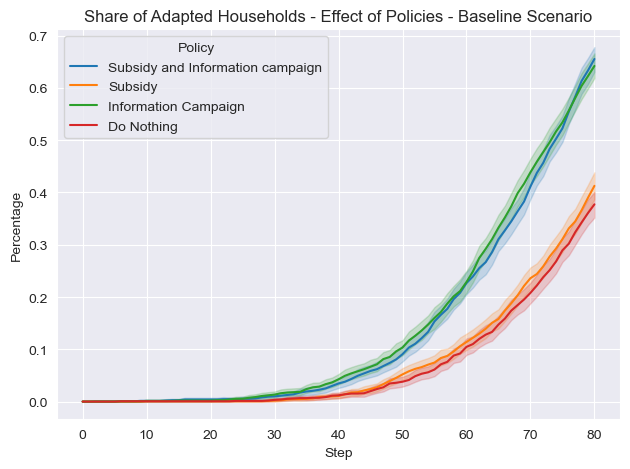

In [55]:
g = sns.lineplot(
    data=base.loc[base['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    hue='Policy',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Share of Adapted Households - Effect of Policies - Baseline Scenario')
g.set(ylabel='Percentage')
plt.grid(True)
plt.tight_layout()
g.figure.savefig("Policies - Share of Adapted Households - Policies - Baseline Scenario.jpg")

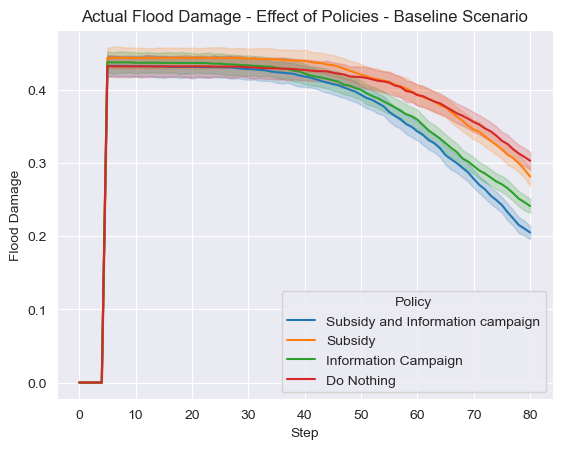

In [155]:
g = sns.lineplot(
    data=base.loc[base['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    hue='Policy',
    y='FloodDamageActual',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Actual Flood Damage - Effect of Policies - Baseline Scenario')
g.set(ylabel='Flood Damage')
plt.grid(True)
g.figure.savefig("Policies - Actual Flood Damage - Policies - Baseline Scenario.jpg")

In [131]:
def plot_actions_scenarios(df_comp, title, scenario):
    alpha =1
    df = df_comp.loc[df_comp['Step']==80]
    a = df.loc[df['Policy']=='Do Nothing']
    a1 = [a[a['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
    b = df.loc[df['Policy']=='Subsidy']
    b1 = [b[b['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
    c = df.loc[df['Policy']=='Information Campaign']
    c1 = [c[c['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha]
    d = df.loc[df['Policy']=='Subsidy & Information Campaign']
    d1 = [d[d['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,d[d['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, d[d['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, d[d['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,d[d['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha]


    adaptation = pd.DataFrame({"Do Nothing": a1, "Subsidy": b1, "Information Campaign": c1, 'Subsidy & Information campaign': d1})
    ax = adaptation.plot.bar(color=sns.color_palette('tab10'))  
    actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
    ax.set_ylabel('Total Action')
    ax.set_xticklabels(actions)
    ax.set_title(f'Flood Actions taken in last Timestep - Effect of Policies - {title}')
    ax.figure.savefig(f'2_03{scenario} Flood Actions taken in last Timestep- Effect of Policies - {title}.jpg')
    plt.grid(True)
    ax.figure.tight_layout()

In [77]:
#base.loc[base['Step'] == 80]plot_actions(base, 'Baseline Scenario', 'BASE')

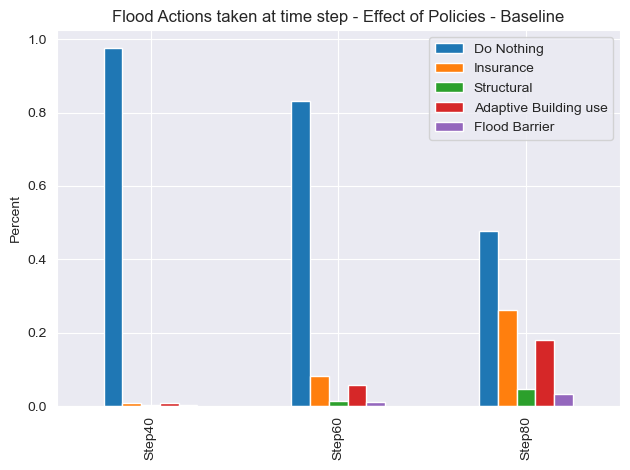

In [136]:
plot_actions(df=base, title='Effect of Policies - Baseline', scenario='Policies')

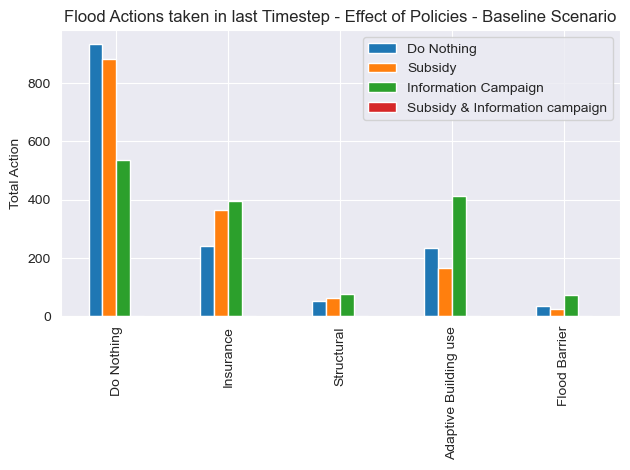

In [132]:
plot_actions_scenarios(df_comp=base, title='Baseline Scenario', scenario='Policies')

Now Urban 

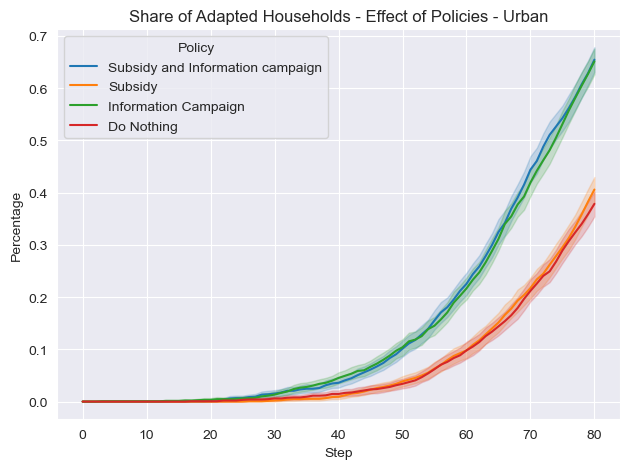

In [138]:
g = sns.lineplot(
    data=socio1.loc[socio1['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    hue='Policy',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Share of Adapted Households - Effect of Policies - Urban')
g.set(ylabel='Percentage')
plt.grid(True)
plt.tight_layout()
g.figure.savefig("Urban - Share of Adapted Households - Policies - Urban.jpg")

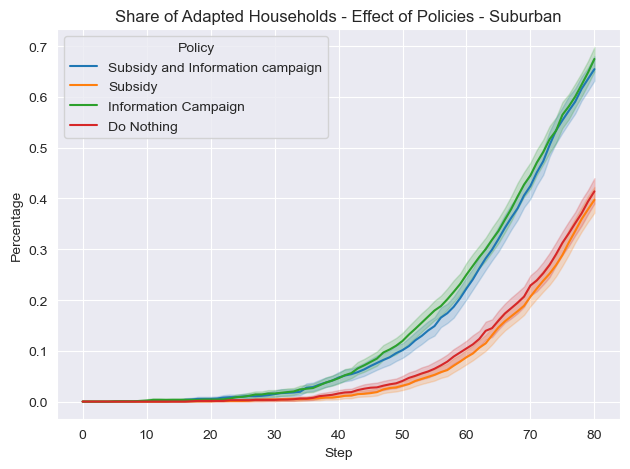

In [140]:
g = sns.lineplot(
    data=socio4.loc[socio4['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    hue='Policy',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Share of Adapted Households - Effect of Policies - Suburban')
g.set(ylabel='Percentage')
plt.grid(True)
plt.tight_layout()
g.figure.savefig("Suburban - Share of Adapted Households - Policies - Suburban.jpg")

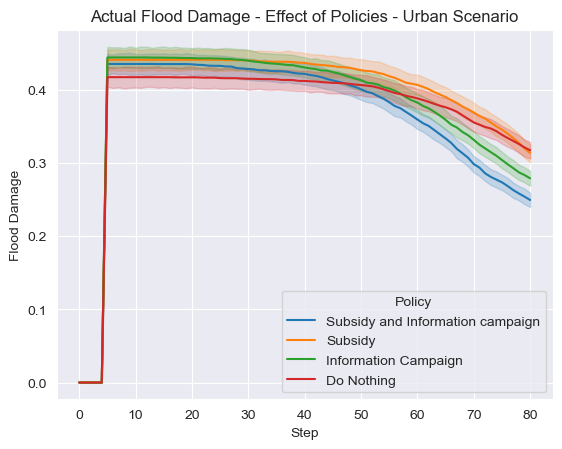

In [154]:
g = sns.lineplot(
    data=socio1.loc[socio1['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    hue='Policy',
    y='FloodDamageActual',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Actual Flood Damage - Effect of Policies - Urban Scenario')
g.set(ylabel='Flood Damage')
plt.grid(True)
g.figure.savefig("Urban - Actual Flood Damage - Policies - Urban Scenario.jpg")

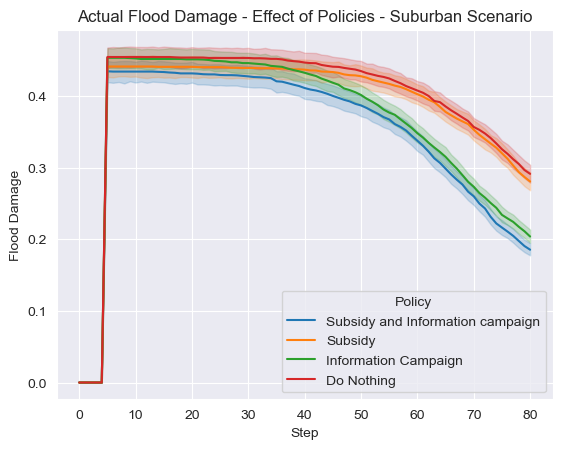

In [153]:
g = sns.lineplot(
    data=socio4.loc[socio4['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    hue='Policy',
    y='FloodDamageActual',
    errorbar=("ci", 95),
    palette="tab10"  
)
g.set(title='Actual Flood Damage - Effect of Policies - Suburban Scenario')
g.set(ylabel='Flood Damage')
plt.grid(True)
g.figure.savefig("Subrban - Actual Flood Damage - Policies - Suburban Scenario.jpg")

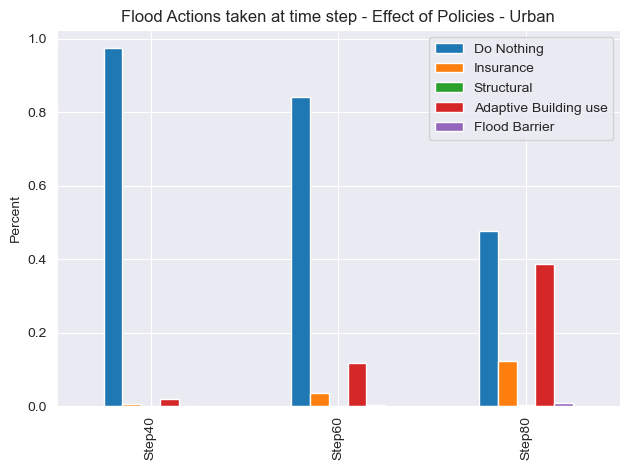

In [146]:
plot_actions(df=socio1, title='Effect of Policies - Urban', scenario='Urban')

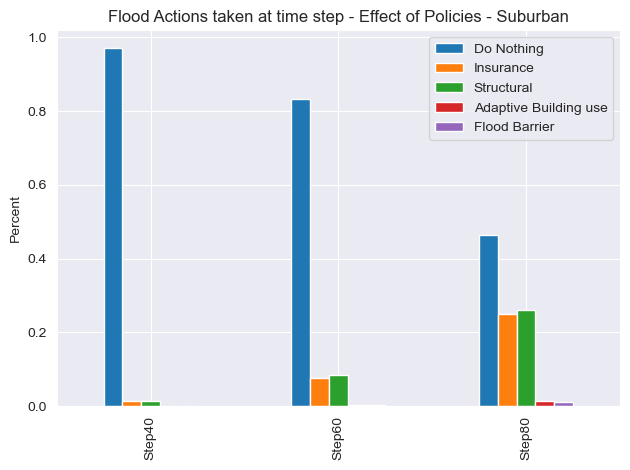

In [147]:
plot_actions(df=socio4, title='Effect of Policies - Suburban', scenario='Suburban')

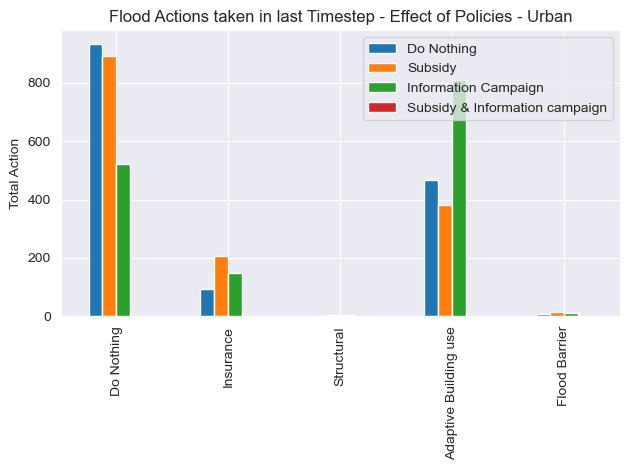

In [148]:
plot_actions_scenarios(df_comp=socio1, title='Urban', scenario='Urban')

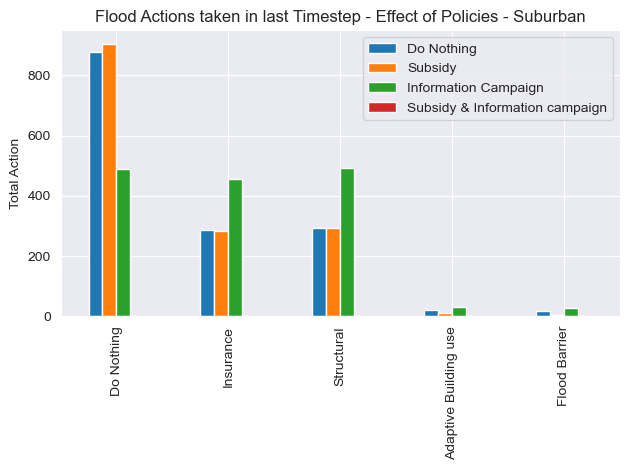

In [149]:
plot_actions_scenarios(df_comp=socio4, title='Suburban', scenario='Suburban')

KPI 

In [151]:
#measure in last Step
last = results.loc[results['Step']==80]
last.groupby(by='Policy')['FloodDamageActual'].mean()
baselast = base.loc[base['Step']==80]
socio1last = socio1.loc[socio1['Step']==80]
socio4last = socio4.loc[socio4['Step']==80]
#Data for Flood Damage Measurement over the different scenarios
a1 = socio1last.loc[socio1last['Policy']=='Do Nothing']['FloodDamageActual']
b1 = socio1last.loc[socio1last['Policy']=='Information Campaign']['FloodDamageActual']
c1 = socio1last.loc[socio1last['Policy']=='Subsidy']['FloodDamageActual']
d1 = socio1last.loc[socio1last['Policy']=='Subsidy and Information campaign']['FloodDamageActual']

a4 = socio4last.loc[socio4last['Policy']=='Do Nothing']['FloodDamageActual']
b4 = socio4last.loc[socio4last['Policy']=='Information Campaign']['FloodDamageActual']
c4 = socio4last.loc[socio4last['Policy']=='Subsidy']['FloodDamageActual']
d4 = socio4last.loc[socio4last['Policy']=='Subsidy and Information campaign']['FloodDamageActual']

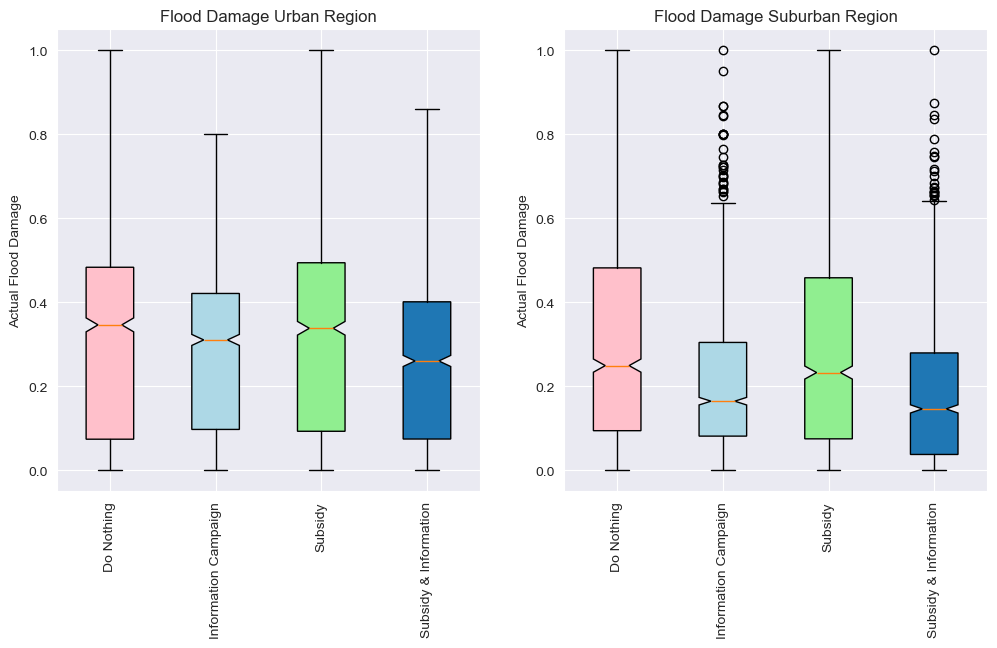

In [152]:
x = np.arange(1,5)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

flooddamage_list1 = [a1, b1, c1, d1]
flooddamage_list2 = [a4, b4, c4, d4]

labels = ['Do Nothing', 'Information Campaign', 'Subsidy', 'Subsidy & Information' ]
# plt.xticks(x, labels, rotation='vertical' )
colors = ['pink', 'lightblue', 'lightgreen']
# rectangular box plot
bplot1 = ax1.boxplot(flooddamage_list1,
                     notch=True,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Flood Damage Urban Region')
ax1.set_xticks(x, labels, rotation='vertical' )
ax1.set_ylabel('Actual Flood Damage')

bplot2 = ax2.boxplot(flooddamage_list2,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Flood Damage Suburban Region')
ax2.set_xticks(x, labels, rotation='vertical' )
ax2.set_ylabel('Actual Flood Damage')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.savefig('Boxplot Actual Flood Damage.png')

# Sensitivity tryouts 

In [4]:
params_sens = {'number_of_households':50, 'flood_map_choice':"harvey", 'network':"watts_strogatz", 'I_threshold':50000, 'policy':1.0, 'age_mean':40, 'income_mean': 50000, 'response_efficacy_mean': [0.09, 0.1, 0.11], 'self_efficacy_mean': [0.09,0.1,0.11]}

In [6]:
results_agent_nopolicy, results_nopolicy = runandplot(params=params_sens,scenario='rand')


  0%|          | 0/270 [00:00<?, ?it/s]

100%|██████████| 270/270 [00:47<00:00,  5.72it/s]


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'response_efficacy_mean', 'self_efficacy_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [8]:
results = results_nopolicy
results_agent = results_agent_nopolicy

results['Policy'] = 'No Policy'
#Policy 1 = Do Nothing 
#Policy 2 = I_threshold
#Policy 3 = response efficacy 
#Policy 4 = reduce cost and response efficiacy (mediocre) 


pol1 = results.loc[(results['I_threshold']==50000) & ((results['policy']==1.0))].index
pol2 = results.loc[(results['I_threshold']==40000) & ((results['policy']==1.0))].index
pol3 = results.loc[(results['I_threshold']==50000) & ((results['policy']==0.8))].index
pol4 =  results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
pol5 = results.loc[(results['I_threshold']==40000) & ((results['policy']==0.8))].index
results.loc[pol1,'Policy']='Do Nothing'
results.loc[pol2,'Policy']='Subsidy'
results.loc[pol3,'Policy']='Information Campaign'
results.loc[pol4,'Policy']='Subsidy and Information campaign'

#Ithreshold
results['Subsidy'] = 'i'

I1 = results.loc[(results['I_threshold']==50000)].index
I2 = results.loc[(results['I_threshold']==45000)].index
I3 = results.loc[(results['I_threshold']==40000)].index

results.loc[I1,'Subsidy']='No Subsidy'
results.loc[I2,'Subsidy']='Mediocre Subsidy'
results.loc[I3,'Subsidy']='High Subsidy'

#'policy'
#Ithreshold
results['Information Campaign'] = 'i'

Inf1 = results.loc[(results['policy']==1.0)].index
Inf2 = results.loc[(results['policy']==0.9)].index
Inf3 = results.loc[(results['policy']==0.8)].index

results.loc[Inf1,'Information Campaign']='No Information'
results.loc[Inf2,'Information Campaign']='Mediocre Information'
results.loc[Inf3,'Information Campaign']='High Information'

results['FloodDamageActual'] = results['FloodDamageActual']*788



socio1 = results.loc[(results['age_mean']==30) & ((results['income_mean']==30000))]
socio2 = results.loc[(results['age_mean']==50) & ((results['income_mean']==30000))]
socio3 = results.loc[(results['age_mean']==30) & ((results['income_mean']==80000))]
socio4 = results.loc[(results['age_mean']==50) & ((results['income_mean']==80000))]
base = results.loc[(results['age_mean']==40) & ((results['income_mean']==50000))]
agent1 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==30000))]
agent2 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==30000))]
agent3 = results_agent.loc[(results['age_mean']==30) & ((results_agent['income_mean']==80000))]
agent4 = results_agent.loc[(results['age_mean']==50) & ((results_agent['income_mean']==80000))]
agnetbase = results_agent.loc[(results['age_mean']==40) & ((results_agent['income_mean']==50000))]

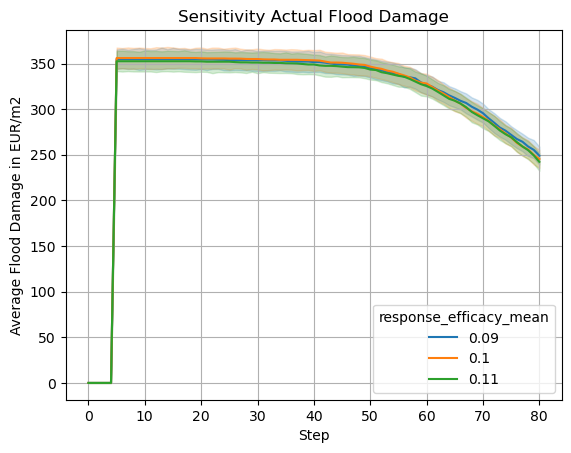

In [15]:
g = sns.lineplot(
    data=base.loc[base['self_efficacy_mean']==0.1], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue = 'response_efficacy_mean',
    palette="tab10"  
)
g.set(title='Sensitivity Actual Flood Damage')
g.set(ylabel='Average Flood Damage in EUR/m2')
plt.grid(True)
g.figure.savefig("SENSE Actual Flood Damage - Baseline Scenario.jpg")

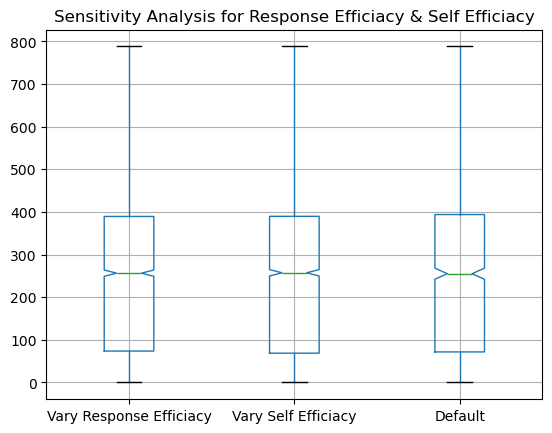

In [51]:
resp = base.loc[base['self_efficacy_mean']==0.1]
self = base.loc[base['response_efficacy_mean']==0.1]
default = base.loc[(base['response_efficacy_mean']==0.1) & (base['self_efficacy_mean']==0.1)]
sense = pd.concat([resp.loc[resp['Step']==80]['FloodDamageActual'], self.loc[self['Step']==80]['FloodDamageActual'], default.loc[default['Step']==80]['FloodDamageActual'] ], axis=1)
#plt.boxplot(resp.loc[resp['Step']==80]['FloodDamageActual'], self.loc[self['Step']==80]['FloodDamageActual'])

g = sense.boxplot(notch=True,  # notch shape
             vert=True,  # vertical box alignment
             )
g.set_xticks([1,2,3],['Vary Response Efficiacy','Vary Self Efficiacy','Default'])
g.set_title('Sensitivity Analysis for Response Efficiacy & Self Efficiacy')
g.figure.savefig('Sensitivity Analysis for Response Efficiacy & Self Efficiacy.jpg')

NameError: name 'a1' is not defined

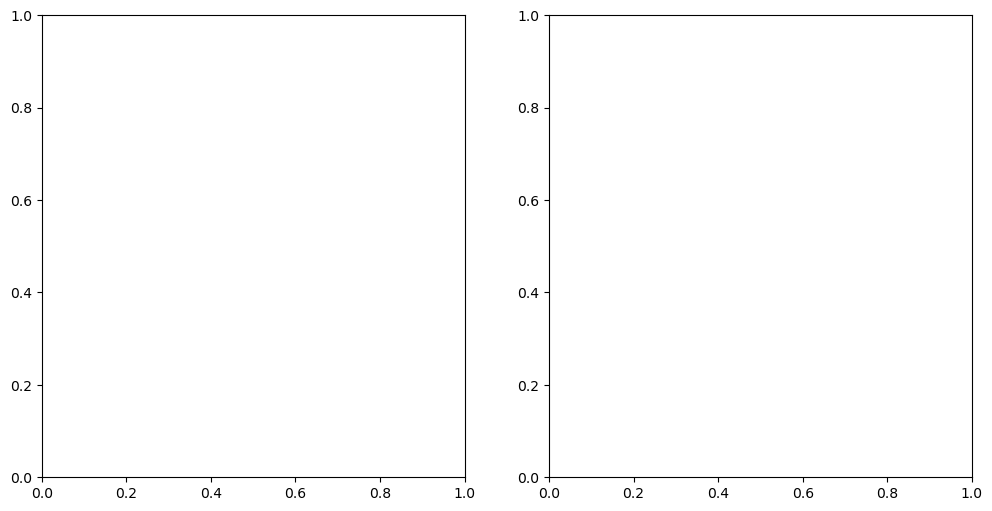

In [37]:
x = np.arange(1,5)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

flooddamage_list1 = [a1, b1, c1, d1]
flooddamage_list2 = [a4, b4, c4, d4]

labels = ['Do Nothing', 'Information Campaign', 'Subsidy', 'Subsidy & Information' ]
# plt.xticks(x, labels, rotation='vertical' )
colors = ['pink', 'lightblue', 'lightgreen']
# rectangular box plot
bplot1 = ax1.boxplot(flooddamage_list1,
                     notch=True,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Flood Damage Urban Region')
ax1.set_xticks(x, labels, rotation='vertical' )
ax1.set_ylabel('Actual Flood Damage')

bplot2 = ax2.boxplot(flooddamage_list2,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Flood Damage Suburban Region')
ax2.set_xticks(x, labels, rotation='vertical' )
ax2.set_ylabel('Actual Flood Damage')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.savefig('Boxplot Actual Flood Damage.png')

# Code Scrapyard ::

100%|██████████| 90/90 [00:13<00:00,  6.75it/s]


Column names in the dataframe: ['RunId', 'iteration', 'Step', 'number_of_households', 'flood_map_choice', 'network', 'I_threshold', 'policy', 'age_mean', 'income_mean', 'response_efficacy_mean', 'total_adapted_households', 'AgentID', 'FloodDepthEstimated', 'FloodDamageEstimated', 'FloodDepthActual', 'FloodDamageActual', 'IsAdapted', 'FriendsCount', 'location', 'Worry', 'Self_Adaption', 'Self_Investment', 'Cum_Invest', 'Neighbours', 'Income', 'Age', 'Costs', 'W2P']


In [ ]:
#measure in last Step
last = results.loc[results['Step']==80]

In [ ]:
last.groupby(by='Policy')['FloodDamageActual'].mean()

Policy
Do Nothing                          0.311652
Information Campaign                0.237129
No Policy                           0.264145
Subsidy                             0.300094
Subsidy and Information campaign    0.217029
Name: FloodDamageActual, dtype: float64

In [ ]:
baselast = base.loc[base['Step']==80]
socio1last = socio1.loc[socio1['Step']==80]
socio4last = socio4.loc[socio4['Step']==80]

In [ ]:
#Data for Flood Damage Measurement over the different scenarios
a1 = socio1last.loc[socio1last['Policy']=='Do Nothing']['FloodDamageActual']
b1 = socio1last.loc[socio1last['Policy']=='Information Campaign']['FloodDamageActual']
c1 = socio1last.loc[socio1last['Policy']=='Subsidy']['FloodDamageActual']
d1 = socio1last.loc[socio1last['Policy']=='Subsidy and Information campaign']['FloodDamageActual']

a4 = socio4last.loc[socio4last['Policy']=='Do Nothing']['FloodDamageActual']
b4 = socio4last.loc[socio4last['Policy']=='Information Campaign']['FloodDamageActual']
c4 = socio4last.loc[socio4last['Policy']=='Subsidy']['FloodDamageActual']
d4 = socio4last.loc[socio4last['Policy']=='Subsidy and Information campaign']['FloodDamageActual']

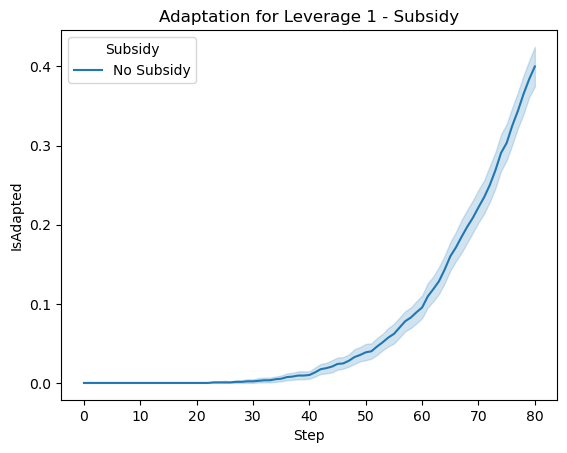

In [16]:
g = sns.lineplot(
    data=base.loc[base['policy']==1.0], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Subsidy",
    palette="tab10"  
)
g.set(title='Adaptation for Leverage 1 - Subsidy')
g.figure.savefig("AdaptationSubsidy.png")

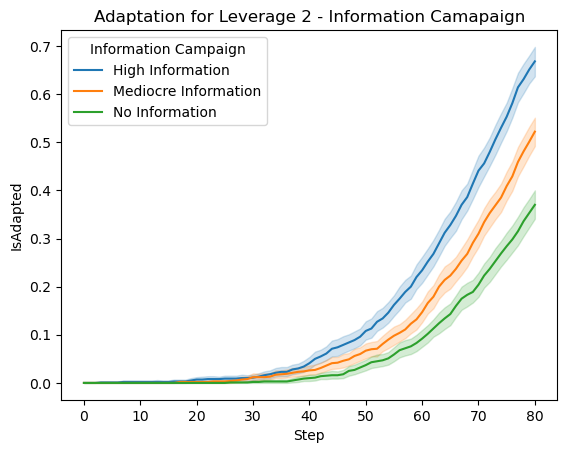

In [ ]:
g = sns.lineplot(
    data=base.loc[base['I_threshold']==50000], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Information Campaign",
    palette="tab10"  
)
g.set(title='Adaptation for Leverage 2 - Information Camapaign')
g.figure.savefig("AdaptationInformatino.png")

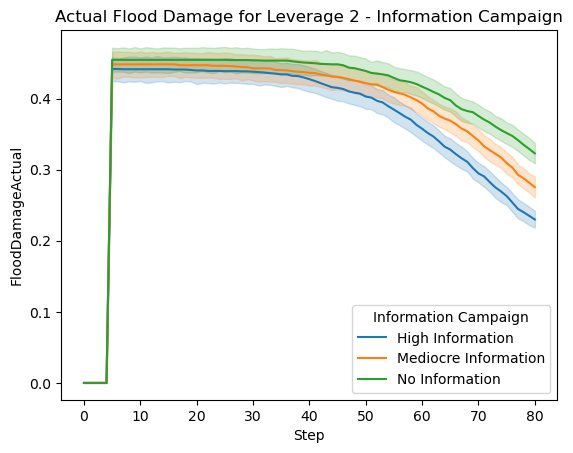

In [ ]:
g = sns.lineplot(
    data=base.loc[base['I_threshold']==50000], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Information Campaign",
    palette="tab10"  
)
g.set(title='Actual Flood Damage for Leverage 2 - Information Campaign')
g.figure.savefig("FloodDamageInformation.png")

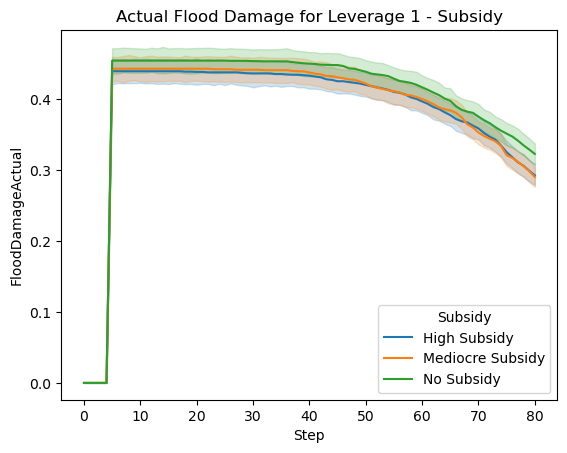

In [ ]:
g = sns.lineplot(
    data=base.loc[base['policy']==1.0], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Subsidy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage for Leverage 1 - Subsidy')
g.figure.savefig("FloodDamageSubsidy.png")

##### Analysis for joint Policy

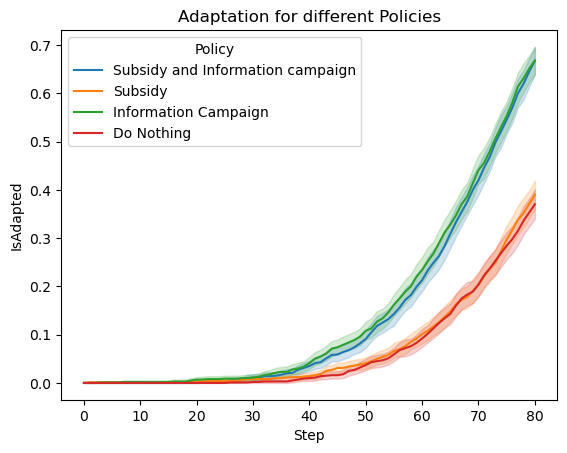

In [ ]:
g = sns.lineplot(
    data=base.loc[base['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Adaptation for different Policies')
g.figure.savefig("Adaptation_Policy.png")

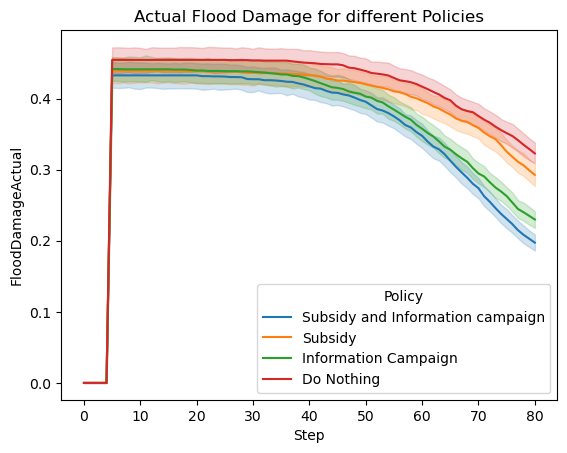

In [ ]:
g = sns.lineplot(
    data=base.loc[base['Policy']!='No Policy'], #set policy to 1 for good result
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage for different Policies')
g.figure.savefig("FloodDamage_Policy.png")

##### Analysis on the socioeconomic Experiments

[Text(0.5, 1.0, 'Adaptation in Socio Economic Region 1')]

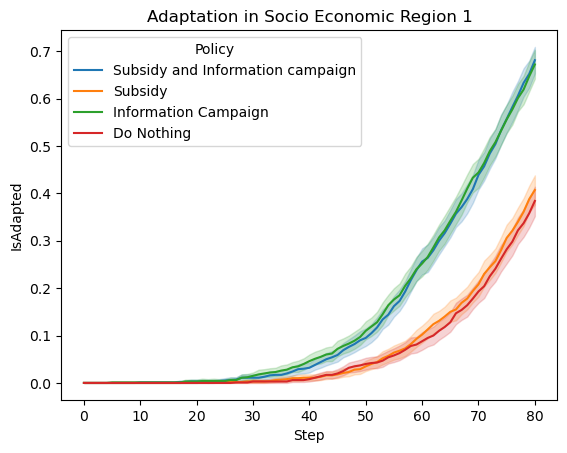

In [ ]:
g = sns.lineplot(
    data=socio1.loc[socio1['Policy']!='No Policy'],
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Adaptation in Urban Region (SocioEconomic1)')
g.figure.savefig("AdaptationUrban.png")

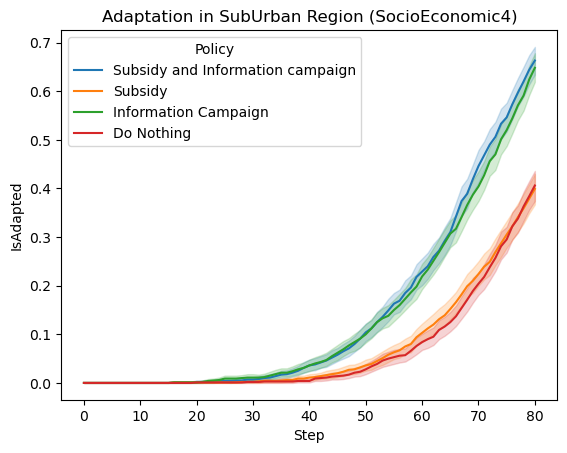

In [ ]:
g = sns.lineplot(
    data=socio4.loc[socio4['Policy']!='No Policy'],
    x="Step",
    y='IsAdapted',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Adaptation in SubUrban Region (SocioEconomic4)')
g.figure.savefig("AdaptationSubUrban.png")

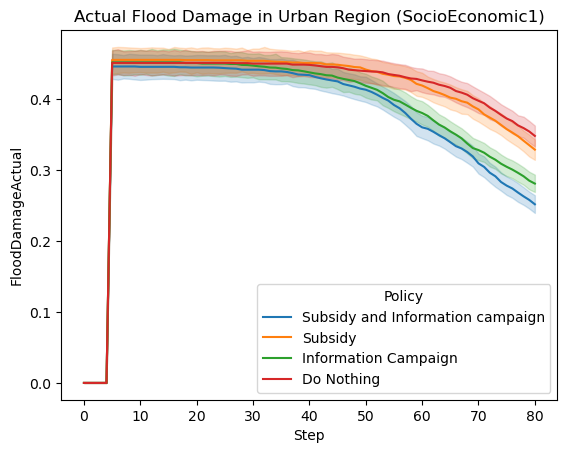

In [ ]:
g = sns.lineplot(
    data=socio1.loc[socio1['Policy']!='No Policy'],
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage in Urban Region (SocioEconomic1)')
g.figure.savefig("FloodDamageUrban.png")

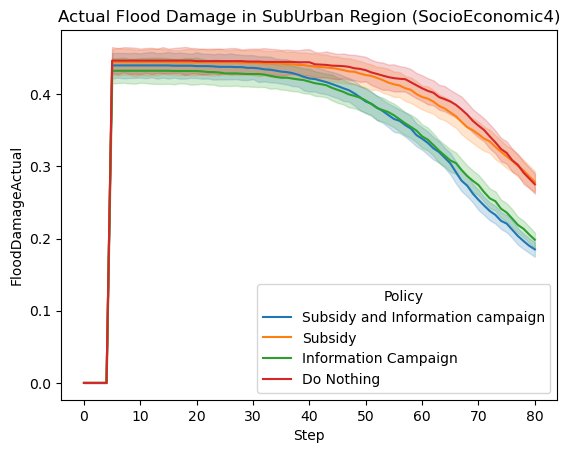

In [ ]:
g = sns.lineplot(
    data=socio4.loc[socio4['Policy']!='No Policy'],
    x="Step",
    y='FloodDamageActual',
    errorbar=("ci", 95),
    hue="Policy",
    palette="tab10"  
)
g.set(title='Actual Flood Damage in SubUrban Region (SocioEconomic4)')
g.figure.savefig("FloodDamageSubUrban.png")

### Define KPIs 

In [ ]:
#measure in last Step
last = results.loc[results['Step']==80]

In [ ]:
last.groupby(by='Policy')['FloodDamageActual'].mean()

Policy
Do Nothing                          0.311652
Information Campaign                0.237129
No Policy                           0.264145
Subsidy                             0.300094
Subsidy and Information campaign    0.217029
Name: FloodDamageActual, dtype: float64

In [ ]:
baselast = base.loc[base['Step']==80]
socio1last = socio1.loc[socio1['Step']==80]
socio4last = socio4.loc[socio4['Step']==80]

In [ ]:
#Data for Flood Damage Measurement over the different scenarios
a1 = socio1last.loc[socio1last['Policy']=='Do Nothing']['FloodDamageActual']
b1 = socio1last.loc[socio1last['Policy']=='Information Campaign']['FloodDamageActual']
c1 = socio1last.loc[socio1last['Policy']=='Subsidy']['FloodDamageActual']
d1 = socio1last.loc[socio1last['Policy']=='Subsidy and Information campaign']['FloodDamageActual']

a4 = socio4last.loc[socio4last['Policy']=='Do Nothing']['FloodDamageActual']
b4 = socio4last.loc[socio4last['Policy']=='Information Campaign']['FloodDamageActual']
c4 = socio4last.loc[socio4last['Policy']=='Subsidy']['FloodDamageActual']
d4 = socio4last.loc[socio4last['Policy']=='Subsidy and Information campaign']['FloodDamageActual']

KeyError: 0

In [ ]:
flooddamage = pd.DataFrame({"Urban - Do Nothing": a1, "Urban - Information": b1, "Urban - Subsidy": c1, "Urban - Subsidy&Information":d1,
                            "Suburban - Do Nothing": a4, "Suburban - Information": b4, "Suburban - Subsidy": c4, "Suburban - Subsidy&Information":d4,})


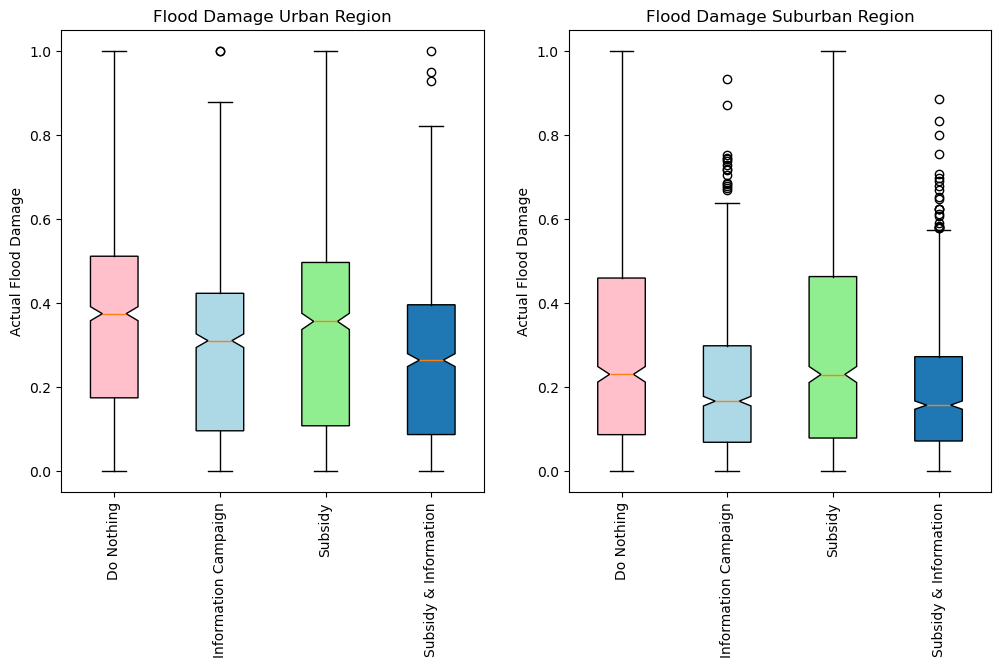

In [ ]:
x = np.arange(1,5)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

flooddamage_list1 = [a1, b1, c1, d1]
flooddamage_list2 = [a4, b4, c4, d4]

labels = ['Do Nothing', 'Information Campaign', 'Subsidy', 'Subsidy & Information' ]
# plt.xticks(x, labels, rotation='vertical' )
colors = ['pink', 'lightblue', 'lightgreen']
# rectangular box plot
bplot1 = ax1.boxplot(flooddamage_list1,
                     notch=True,
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.set_title('Flood Damage Urban Region')
ax1.set_xticks(x, labels, rotation='vertical' )
ax1.set_ylabel('Actual Flood Damage')

bplot2 = ax2.boxplot(flooddamage_list2,
                     notch=True,  # notch shape
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.set_title('Flood Damage Suburban Region')
ax2.set_xticks(x, labels, rotation='vertical' )
ax2.set_ylabel('Actual Flood Damage')
# fill with colors
colors = ['pink', 'lightblue', 'lightgreen']
for bplot in (bplot1, bplot2):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

fig.savefig('Boxplot Actual Flood Damage.png')


now for Adapted agents 

In [ ]:
#Data for Flood Damage Measurement over the different scenarios
a1 = socio1last.loc[socio1last['Policy']=='Do Nothing']['IsAdapted'].value_counts()[0]
b1 = socio1last.loc[socio1last['Policy']=='Information Campaign']['IsAdapted'].value_counts()[0]
c1 = socio1last.loc[socio1last['Policy']=='Subsidy']['IsAdapted'].value_counts()[0]
d1 = socio1last.loc[socio1last['Policy']=='Subsidy and Information campaign']['IsAdapted'].value_counts()[0]

a4 = socio4last.loc[socio4last['Policy']=='Do Nothing']['IsAdapted'].value_counts()[0]
b4 = socio4last.loc[socio4last['Policy']=='Information Campaign']['IsAdapted'].value_counts()[0]
c4 = socio4last.loc[socio4last['Policy']=='Subsidy']['IsAdapted'].value_counts()[0]
d4 = socio4last.loc[socio4last['Policy']=='Subsidy and Information campaign']['IsAdapted'].value_counts()[0]

In [ ]:
d1[0]

C:\Users\thoma\AppData\Local\Temp\ipykernel_22112\3367005619.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  d1[0]


0.681

C:\Users\thoma\AppData\Local\Temp\ipykernel_22112\4261300646.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adaption_list1 = pd.DataFrame([a1[0], b1[0], c1[0], d1[0]]).T
C:\Users\thoma\AppData\Local\Temp\ipykernel_22112\4261300646.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adaption_list2 = pd.DataFrame([a4[0], b4[0], c4[0], d4[0]]).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


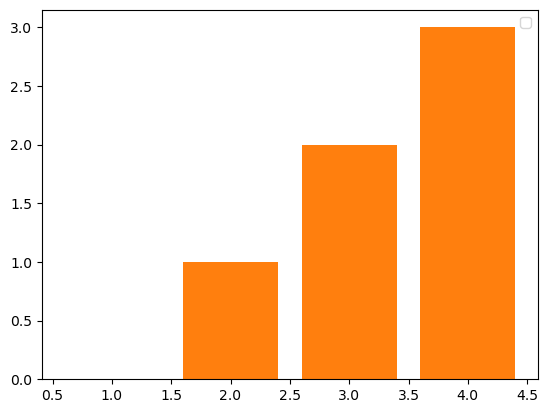

In [ ]:
adaption_list1 = pd.DataFrame([a1[0], b1[0], c1[0], d1[0]]).T
adaption_list2 = pd.DataFrame([a4[0], b4[0], c4[0], d4[0]]).T
labels = ['Do Nothing', 'Information Campaign', 'Subsidy', 'Subsidy & Information' ]
# adaption_list1.plot(kind='bar')
# adaption_list2.plot(kind='bar')
ticks = ['Urban', 'Suburban']
x=[1,2,3,4]

plt.bar(x,adaption_list1)
plt.bar(x,adaption_list2)
plt.legend()


#plt.xticks(x, ticks , rotation='vertical')
# colors = ['pink', 'lightblue', 'lightgreen']
# ax1 = plt.bar(labels, adaption_list1)
# fig.savefig('Boxplot Adapted.png')

<Axes: >

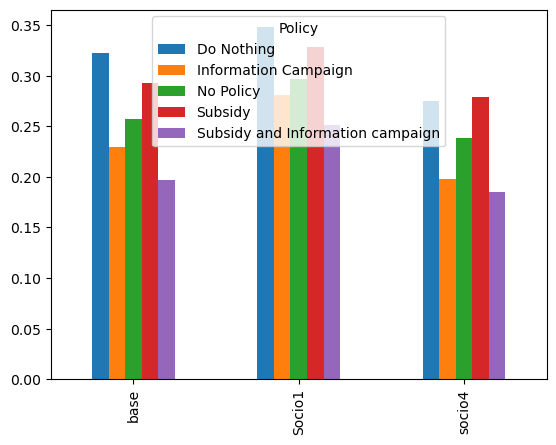

In [ ]:

fb = baselast.groupby(by='Policy')['FloodDamageActual'].mean()
f1 = socio1last.groupby(by='Policy')['FloodDamageActual'].mean()
f2 = socio4last.groupby(by='Policy')['FloodDamageActual'].mean()
flooddamage = pd.DataFrame({"base": fb, "Socio1": f1, "socio4": f2}).T
flooddamage.plot(kind='bar')

In [ ]:
def plot_actions(df, title):
    alpha = df.loc[df['Step']==40].shape[0]
    a = df.loc[df['Step']==40]
    a1 = [a[a['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, a[a['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,a[a['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
    b = df.loc[df['Step']==60]
    b1 = [b[b['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, b[b['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,b[b['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha] 
    c = df.loc[df['Step']==80]
    c1 = [c[c['Self_Adaption'] == 0]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 1]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 2]['Self_Adaption'].count()/alpha, c[c['Self_Adaption'] == 3]['Self_Adaption'].count()/alpha,c[c['Self_Adaption'] == 4]['Self_Adaption'].count()/alpha]
    
    adaptation = pd.DataFrame({"Step40": a1, "Step60": b1, "Step80": c1})
    ax = adaptation.plot.bar()  
    actions = ['Do Nothing', 'Insurance', 'Structural', 'Adaptive Building use', 'Flood Barrier']
    ax.set_ylabel('Percent')
    ax.set_xticklabels(actions)
    ax.set_title(f'Flood Actions taken at specific time step for {title}')
    ax.figure.savefig('{title}.png')

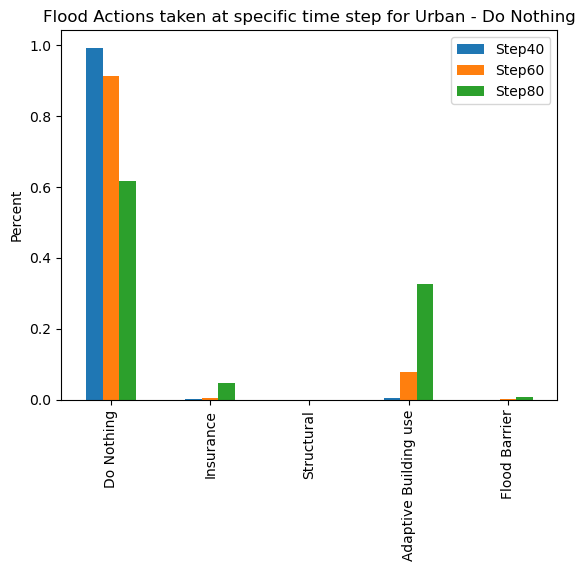

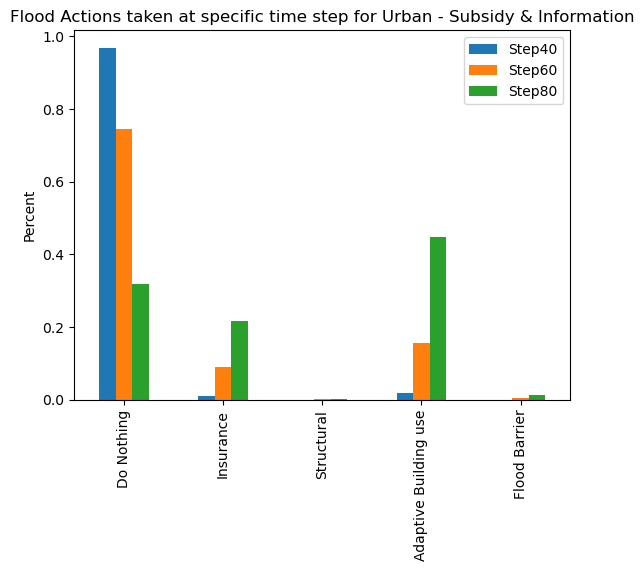

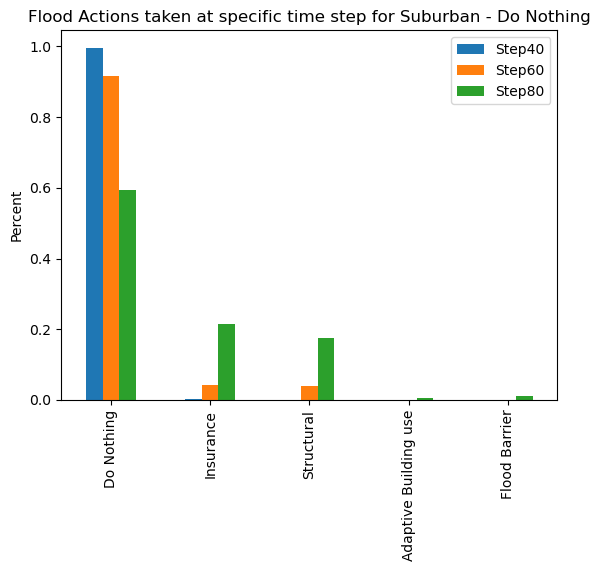

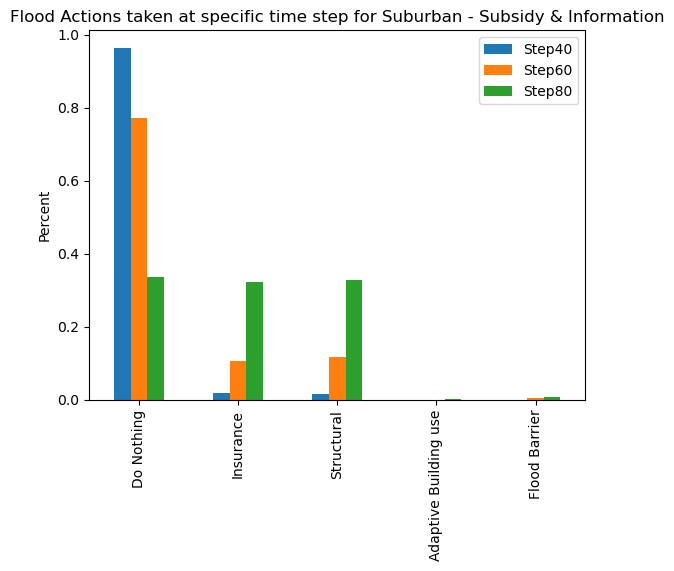

In [ ]:

plot_actions(df=socio1.loc[socio1['Policy']=='Do Nothing'], title='Urban - Do Nothing' )
plot_actions(df=socio1.loc[socio1['Policy']=='Subsidy and Information campaign'], title='Urban - Subsidy & Information' )
plot_actions(df=socio4.loc[socio4['Policy']=='Do Nothing'], title='Suburban - Do Nothing' )
plot_actions(df=socio4.loc[socio4['Policy']=='Subsidy and Information campaign'], title='Suburban - Subsidy & Information' )